<a href="https://colab.research.google.com/github/isabellehaga/aq-data-scientist-test/blob/master/02_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
    Instruções:
        1- Responda as perguntas listadas no README.md;
        2- Faça as análises que julgar necessárias e deixe os resultados de suas análises plotadas no notebook.
"""

In [2]:
#Importando bibliotecas

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

In [15]:
arquivo1 = "/content/focos-desmatamento-mg.geojson"
gdf1 = gpd.read_file(arquivo1)

# Verificar os primeiros registros
gdf1.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777..."
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784..."
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782..."
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782..."
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822..."


Descrição do Dataset:

*   ogc_fid:
*   id:
*   Instância:
*   Data Inicial:
*   Data Final:
*   Cena:
*   Score:
*   Data Processamento:
*   Bioma:
*   NuFis:
*   Cia PM:
*   geometry:


In [5]:
#Verificando se os dados são somente de MG
gdf1['NuFis'].unique()

array(['Triângulo Mineiro', 'Sul', 'Alto Paranaíba', 'Noroeste',
       'Alto São Francisco', 'Norte', 'Central Metropolitana',
       'Zona da Mata', 'Jequitinhonha', 'Leste', 'Nordeste'], dtype=object)

In [6]:
# Reprojetar para calcular área
gdf1 = gdf1.to_crs(epsg=31983)

In [7]:
gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777..."
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784..."
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782..."
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782..."
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822..."


##Qual a área total desmatada em hectares no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022?

In [19]:
# Crianado nova coluna com o valor total da área desmatada em hectares
gdf1['area_ha'] = gdf1.geometry.area / 10000

gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799


In [9]:
# Transformando a coluna 'Data Final' em datetime
gdf1['Data Final'] = pd.to_datetime(gdf1['Data Final'], dayfirst=True)

# Criando nova coluna de mês
gdf1['mes'] = gdf1['Data Final'].dt.month


In [10]:
gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha,mes
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057,8
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201,7
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768,7
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089,8
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799,8


In [11]:
# Agrupar por mês e somar área
area_por_mes = gdf1.groupby('mes')['area_ha'].sum().reset_index()
area_por_mes.rename(columns={'area_ha': 'area_total_ha'}, inplace=True)''

In [13]:
area_por_mes.head()

,mes,area_total_ha
0,6,492.020742
1,7,4191.076846
2,8,7874.595999
3,9,28605.449498


In [14]:
#Somente para melhor visualização

area_agosto = area_por_mes.loc[area_por_mes['mes'] == 8, 'area_total_ha'].values[0]
area_setembro = area_por_mes.loc[area_por_mes['mes'] == 9, 'area_total_ha'].values[0]

# Imprimir de forma amigável
print(f"A área total desmatada em Minas Gerais no mês de agosto de 2022 foi {area_agosto:,.2f} hectares.")
print(f"A área total desmatada em Minas Gerais no mês de setembro de 2022 foi {area_setembro:,.2f} hectares.")


A área total desmatada em Minas Gerais no mês de agosto de 2022 foi 7,874.60 hectares.
A área total desmatada em Minas Gerais no mês de setembro de 2022 foi 28,605.45 hectares.


#Qual a área total desmatada em km² no estado de Minas Gerais em todo o período fornecido (ago/set de 2022) por bioma?

In [21]:
# Criando coluna para cáulculo de área em km²
gdf1['area_km2'] = gdf1['area_ha'] / 100  # 1 km² = 100 hectares

gdf1.head()

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha,area_km2
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057,0.152271
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201,0.742292
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768,0.025648
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089,0.033141
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799,0.806718


In [22]:
# Agrupando por bioma e somando os valores
area_por_bioma = gdf1.groupby('Bioma')['area_km2'].sum().reset_index()
area_por_bioma.rename(columns={'area_km2': 'area_total_km2'}, inplace=True)

area_por_bioma


,Bioma,area_total_km2
0,Caatinga,58.671766
1,Cerrado,234.941821
2,Mata Atlântica,118.017844


In [23]:
# Iterar sobre cada bioma e imprimir a área total em km²
for _, row in area_por_bioma.iterrows():
    bioma = row['Bioma']
    area = row['area_total_km2']
    print(f"A área total desmatada no bioma {bioma} foi {area:,.2f} km².")


A área total desmatada no bioma Caatinga foi 58.67 km².
A área total desmatada no bioma Cerrado foi 234.94 km².
A área total desmatada no bioma Mata Atlântica foi 118.02 km².


# Qual a área total desmatada em km² no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022, por município?

In [25]:
gdf1.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha,area_km2
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057,0.152271
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201,0.742292
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768,0.025648
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089,0.033141
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799,0.806718


Como o arquivo focos-desmatamento-mg não possui a coluna minicipios precisamos relaionar com outro arquivo shape

In [32]:
# GeoDataFrame dos municípios de MG
gdf_mun = gpd.read_file("/content/municipios-mg.geojson")
gdf_mun = gdf_mun.to_crs(epsg=31983)  # mesma projeção do gdf1

gdf_mun.head(5)

,id,name,description,area_km2,geometry
0,3100104,Abadia dos Dourados,Abadia dos Dourados,895.115178,"POLYGON ((241429.802 7990562.876, 242359.697 7..."
1,3100203,Abaeté,Abaeté,1814.504046,"POLYGON ((480831.209 7911603.048, 481764.623 7..."
2,3100302,Abre Campo,Abre Campo,472.049598,"POLYGON ((775002.321 7771717.815, 776244.59 77..."
3,3100401,Acaiaca,Acaiaca,100.723996,"POLYGON ((696872.185 7747792.052, 697305.64 77..."
4,3100500,Açucena,Açucena,812.875627,"POLYGON ((775332.208 7905556.756, 775804.655 7..."


In [33]:
# Só garantindo que o primeiro DF (gdf1) também está na mesma projeção
gdf1 = gdf1.to_crs(epsg=31983)

In [36]:
# Função Spatial join: associa cada polígono de desmatamento ao município que ele intersecta.
gdf1_mun = gpd.sjoin(gdf1, gdf_mun[['name', 'geometry']], how='left', predicate='intersects')

# Agora gdf1_mun tem a coluna 'municipio'
gdf1_mun.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha,area_km2,mes,index_right,name
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057,0.152271,8,304.0,Frutal
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201,0.742292,7,119.0,Campina Verde
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768,0.025648,7,185.0,Comendador Gomes
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089,0.033141,8,185.0,Comendador Gomes
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799,0.806718,8,185.0,Comendador Gomes


In [38]:
gdf1_mun = gdf1_mun.rename(columns={'name': 'municipio'})

# Verificar resultado
gdf1_mun[['municipio']].head()


,municipio
0,Frutal
1,Campina Verde
2,Comendador Gomes
3,Comendador Gomes
4,Comendador Gomes


In [41]:
gdf1_mun['mes'] = gdf1_mun['Data Final'].dt.month
area_por_municipio_mes = gdf1_mun.groupby(['municipio', 'mes'])['area_km2'].sum().reset_index()

print(area_por_municipio_mes)

               municipio  mes  area_km2
0    Abadia dos Dourados    8  0.242598
1    Abadia dos Dourados    9  0.136073
2                 Abaeté    8  0.210202
3                Aimorés    7  0.025325
4                Aimorés    9  1.200132
..                   ...  ...       ...
609        Água Comprida    7  0.496284
610        Água Comprida    8  1.135686
611       Águas Formosas    9  0.262786
612      Águas Vermelhas    6  0.370489
613      Águas Vermelhas    9  0.906330

[614 rows x 3 columns]


In [43]:
area_por_municipio_mes.to_excel("/content/area_por_municipio_mes.xlsx", index=False)


# Análise de correlação entre as variáveis de população e PIB dos municípios de Minas Gerais e a área desmatada (ha)

Para fazer essa analise de correlação preciso de um DF final que tenha os dados:
 e

*   população
*   PIB dos municípios de Minas Gerais
*   Área desmatada (ha)

nos meus DF só possuo a area desmatada (ha), vou importar os dados de PIB e população



In [57]:
# carregar o CSV
df_pop_pib = pd.read_csv("/content/populacao-pib-municipios-mg.csv")

# dar uma olhada nas primeiras linhas
df_pop_pib.head(5)

,municipio,pop,PIB
0,Abadia dos Dourados,6365.0,25174.26
1,Abaeté,23161.0,23266.10
2,Abre Campo,14312.0,19553.86
3,Acaiaca,3997.0,16247.06
4,Açucena,8995.0,17888.20


In [74]:
#vou utilizar o geoDF chamado gdf1_mun para somar área desmatada por município
# Lembrar o que era esse DF
gdf1_mun

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,area_ha,area_km2,mes,index_right,municipio
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",15.227057,0.152271,8,304.0,Frutal
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",74.229201,0.742292,7,119.0,Campina Verde
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",2.564768,0.025648,7,185.0,Comendador Gomes
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",3.314089,0.033141,8,185.0,Comendador Gomes
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",80.671799,0.806718,8,185.0,Comendador Gomes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,NaN,1485,3119,16/08/2022,2022-09-10,24LTH,0.85,None,Mata Atlântica,Jequitinhonha,15,"POLYGON ((904720.028 8256294.185, 904749.044 8...",9.237218,0.092372,9,567.0,Pedra Azul
2036,NaN,1486,3114,16/08/2022,2022-09-10,24LTH,0.81,None,Mata Atlântica,Jequitinhonha,15,"POLYGON ((888566.96 8258582.267, 888564.814 82...",20.032973,0.200330,9,247.0,Divisa Alegre
2037,NaN,1487,2830,16/08/2022,2022-09-10,23LRC,0.86,None,Mata Atlântica,Jequitinhonha,15,"POLYGON ((890075.753 8267489.965, 890066.941 8...",11.085379,0.110854,9,9.0,Águas Vermelhas
2037,NaN,1487,2830,16/08/2022,2022-09-10,23LRC,0.86,None,Mata Atlântica,Jequitinhonha,15,"POLYGON ((890075.753 8267489.965, 890066.941 8...",11.085379,0.110854,9,247.0,Divisa Alegre


In [79]:
# É importante verificar se há duplicatas na coluna municipio
gdf1_mun["municipio"].value_counts()

,count
municipio,
Jaíba,52
Paracatu,50
Janaúba,37
Uberaba,32
João Pinheiro,31
...,...
São José do Goiabal,1
Monte Formoso,1
Rio do Prado,1


In [80]:
#Somando area_ha por municipio por conta das duplicatas
area_por_municipio = gdf1_mun.groupby("municipio")["area_ha"].sum().reset_index()

area_por_municipio.head(5)

,municipio,area_ha
0,Abadia dos Dourados,37.867105
1,Abaeté,21.020224
2,Aimorés,122.545692
3,Alfenas,16.502817
4,Alfredo Vasconcelos,32.213057


In [83]:
# Unir população e PIB

df_merged = pd.merge(df_pop_pib, area_por_municipio, on="municipio", how="inner")


In [84]:
#checar se deu certo
df_merged.head()

,municipio,pop,PIB,area_ha
0,Abadia dos Dourados,6365.0,25174.26,37.867105
1,Abaeté,23161.0,23266.10,21.020224
2,Água Boa,12545.0,14421.07,36.113599
3,Água Comprida,2165.0,115725.51,163.196965
4,Águas Formosas,18841.0,14913.12,26.278578


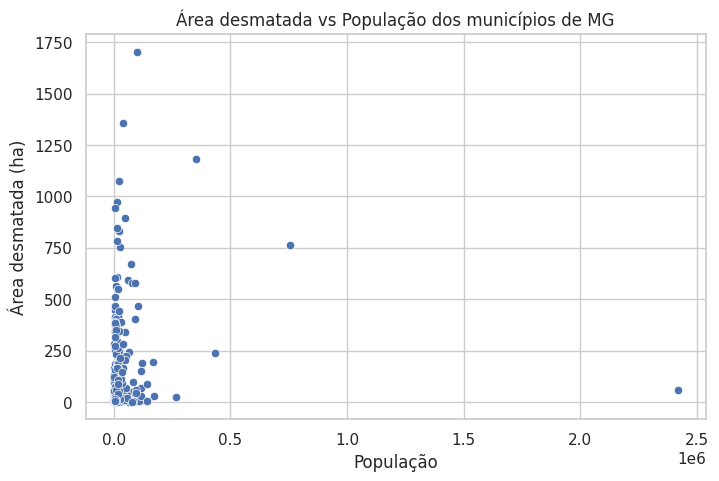

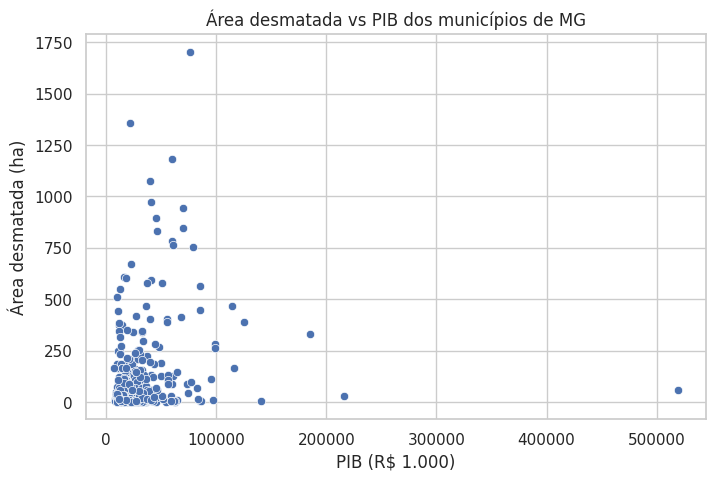

In [85]:
# Verificar se a correlação é positiva, negativa ou não há correlação
sns.set(style="whitegrid")

# Gráfico 1: Área desmatada vs População
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="pop", y="area_ha")
plt.title("Área desmatada vs População dos municípios de MG")
plt.xlabel("População")
plt.ylabel("Área desmatada (ha)")
plt.show()

# Gráfico 2: Área desmatada vs PIB
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="PIB", y="area_ha")
plt.title("Área desmatada vs PIB dos municípios de MG")
plt.xlabel("PIB (R$ 1.000)")
plt.ylabel("Área desmatada (ha)")
plt.show()


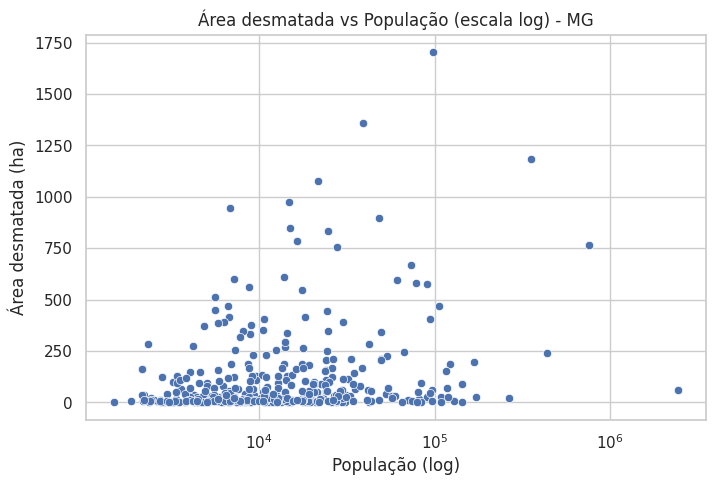

In [86]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_merged, x="pop", y="area_ha")
plt.xscale("log")  # escala logarítmica no eixo x
plt.title("Área desmatada vs População (escala log) - MG")
plt.xlabel("População (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()


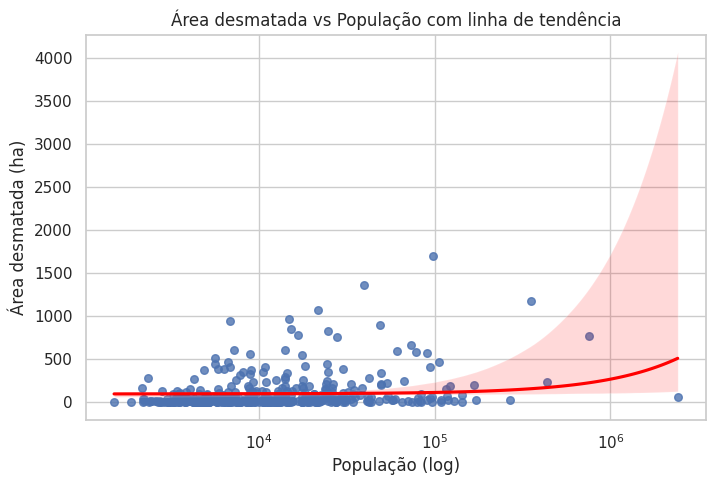

In [87]:
plt.figure(figsize=(8,5))
sns.regplot(data=df_merged, x="pop", y="area_ha", scatter_kws={'s':30}, line_kws={'color':'red'})
plt.xscale("log")
plt.title("Área desmatada vs População com linha de tendência")
plt.xlabel("População (log)")
plt.ylabel("Área desmatada (ha)")
plt.show()


##Vamos calcular a correlação de Pearson



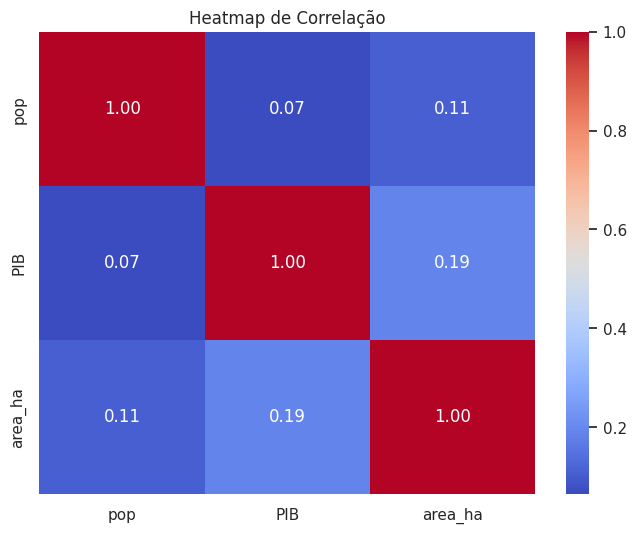

In [88]:
# Selecionando apenas as colunas numéricas
numericas = df_merged[['pop', 'PIB', 'area_ha']]

# Calculando a correlação
corr = numericas.corr()

# Criando o heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlação")
plt.show()

Como a correlação de Pearson indicou correlação fraca vamos partir para outras variáveis que podem indicar um correlação mais forte.